In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

num_classes =10
input_shape= (28,28,1)

#Dividir los datos entre un set de entrenamiento y un set de prueba
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#Escalar las imagenes en un rango entre 0 y 1
x_train=x_train.astype("float32") / 255
x_test=x_test.astype("float32") / 255
#Darle a las imagenes un tamano de (28,28,1)
x_train=np.expand_dims(x_train, -1)
x_test=np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [2]:
# Convertir las clases (etiquetas en salidas)
print(y_train)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

y_test = tf.keras.utils.to_categorical(y_test,10)

[5 0 4 ... 5 6 8]


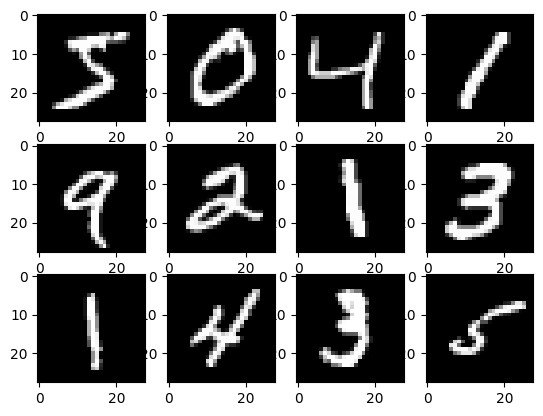

In [3]:
for i in range(12):
  plt.subplot(3,4,i+1)
  #plt.subplot(3, 3, i)
  plt.imshow(x_train[i, :,:,0], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
from tensorflow.keras import layers
model = keras.Sequential(
    [
     keras.Input(shape=input_shape),
     layers.Conv2D(32,kernel_size=(3,3), activation='relu'),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes,activation='softmax'),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [5]:
#Entrenar el modelo
batch_size = 128
epochs = 20
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



Epoch 1/20
422/422 [==============================] - 44s 101ms/step - loss: 0.3614 - accuracy: 0.8925 - val_loss: 0.0823 - val_accuracy: 0.9762
Epoch 2/20
422/422 [==============================] - 42s 98ms/step - loss: 0.1126 - accuracy: 0.9657 - val_loss: 0.0573 - val_accuracy: 0.9847
Epoch 3/20
422/422 [==============================] - 41s 97ms/step - loss: 0.0840 - accuracy: 0.9741 - val_loss: 0.0455 - val_accuracy: 0.9888
Epoch 4/20
422/422 [==============================] - 41s 98ms/step - loss: 0.0691 - accuracy: 0.9788 - val_loss: 0.0418 - val_accuracy: 0.9878
Epoch 5/20
422/422 [==============================] - 41s 96ms/step - loss: 0.0627 - accuracy: 0.9805 - val_loss: 0.0366 - val_accuracy: 0.9897
Epoch 6/20
422/422 [==============================] - 41s 98ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0348 - val_accuracy: 0.9913
Epoch 7/20
422/422 [==============================] - 41s 97ms/step - loss: 0.0509 - accuracy: 0.9837 - val_loss: 0.0344 - val_accuracy

In [6]:
#Evaluar el modelo
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023946888744831085
Test accuracy: 0.9922000169754028


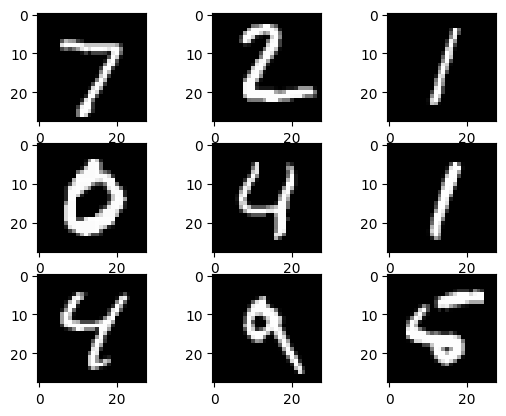

(1, 28, 28, 1)
1/1 [==============================] - 0s 103ms/step
Prediccion:  7 Real:  7
1/1 [==============================] - 0s 29ms/step
Prediccion:  2 Real:  2
1/1 [==============================] - 0s 20ms/step
Prediccion:  1 Real:  1
1/1 [==============================] - 0s 21ms/step
Prediccion:  0 Real:  0
1/1 [==============================] - 0s 23ms/step
Prediccion:  4 Real:  4
1/1 [==============================] - 0s 22ms/step
Prediccion:  1 Real:  1
1/1 [==============================] - 0s 21ms/step
Prediccion:  4 Real:  4
1/1 [==============================] - 0s 21ms/step
Prediccion:  9 Real:  9
1/1 [==============================] - 0s 20ms/step
Prediccion:  5 Real:  5


In [7]:
# Visualizar los resultados del sistema
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(x_test[i,:,:,0], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()
xr=np.expand_dims(x_test, 1)
print(xr[0].shape)

for i in range(9):
  resultado = model.predict(xr[i],batch_size = 0)
  argumento = np.argmax(resultado)
  print('Prediccion: ',argumento, 'Real: ', np.argmax(y_test[i]))